<a href="https://colab.research.google.com/github/JeromeMberia/Mchezopesa_Ltd/blob/main/IP_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6 IP

## \ **Defining the Question**\

### Specifying the Question

Will be peforming the following predition:

> * Predict how many goals the home team scores.
>
> * Predict how many goals the away team scores
>



### Defining the Metric for Success

> Here

### Understanding the context 

> Here

### Recording the Experimental Design

> Here

### Data Relevance

> Here

## \ **Importing the Libraries**\

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## \ **Reading the Data**\

### First Dataset

In [ ]:
fifa = pd.read_csv('/content/fifa_ranking.csv')

### Second Dataset

In [ ]:
results = pd.read_csv('/content/results.csv')

## \ **Checking the Data**\

### First Dataset

In [ ]:
# Determining the no. of records in our dataset
#
records = fifa.shape[0]
print(f'{records} records')

57793 records


In [ ]:
# Number of columns and rows

rows = fifa.shape[0]
columns = fifa.shape[1]

print(f'{rows} rows and {columns} columns')

57793 rows and 16 columns


In [ ]:
# Previewing the top of our dataset
#
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# Previewing the bottom of our dataset
# 
fifa[fifa['confederation']=='CONCACAF'].tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57785,204,British Virgin Islands,VGB,4.25,4,2,0.0,0.0,0.0,0.0,0.0,0.0,21.25,4.25,CONCACAF,2018-06-07
57786,204,Montserrat,MSR,4.25,17,-4,0.0,0.0,0.0,0.0,0.0,0.0,21.25,4.25,CONCACAF,2018-06-07
57787,206,Turks and Caicos Islands,TCA,0.00,13,-4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CONCACAF,2018-06-07
57788,206,Anguilla,AIA,0.00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CONCACAF,2018-06-07


In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# Checking whether each column has an appropriate datatype
#
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
fifa.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [ ]:
col = list(fifa.columns)
for i in col:
  print(f'{i}')
  print('')
  print(fifa[i].unique())
  print('****************************************************************************')
  print('')

rank

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 147 168 169 170 171 172 173 174 176 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 207 206 208 209]
****************************************************************************

country_full

['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina'

In [ ]:
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


### Second Dataset

In [ ]:
# Determining the no. of records in our dataset
records = results.shape[0]
print(f'{records} records')

40839 records


In [ ]:
# Number of columns and rows
rows = results.shape[0]
columns = results.shape[1]

print(f'{rows} rows and {columns} columns')

40839 rows and 9 columns


In [ ]:
# Previewing the top of our dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Previewing the bottom of our dataset 
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Checking whether each column has an appropriate datatype
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [ ]:
col = list(results.columns)
for i in col:
  print(f'{i}')
  print('')
  print(results[i].unique())
  print('')
  print('****************************************************************************')
  print('')

date

['1872-11-30' '1873-03-08' '1874-03-07' ... '2019-07-18' '2019-07-19'
 '2019-07-20']

****************************************************************************

home_team

['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French G

In [ ]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## \ **Tidying the Dataset**\

### First Dataset

#### Missing Data

In [ ]:
# Identifying the Missing Data
#
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

#### Duplicate data

In [ ]:
fifa.duplicated().sum()

37

In [ ]:
fifa = fifa.drop_duplicates()

In [ ]:
fifa.duplicated().sum()

0

#### Outliers

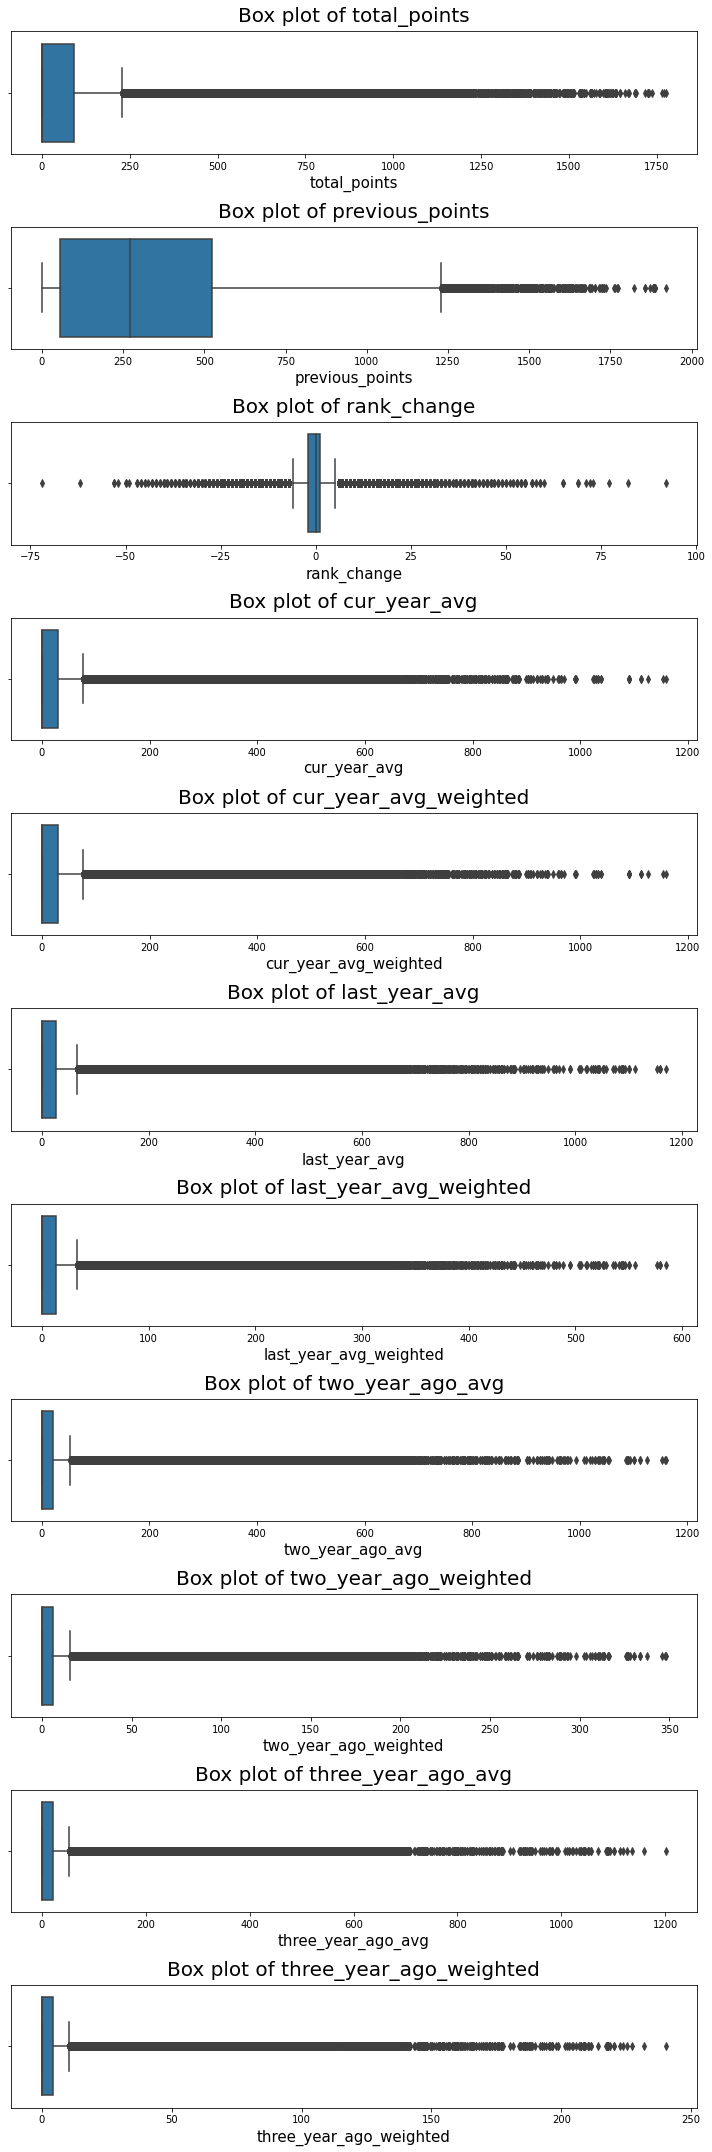

In [ ]:
# Checking for Outliers
#
numeric = fifa.drop(['rank', 'country_full', 'country_abrv', 'confederation', 'rank_date'],axis=1)

columns = None
columns = list(numeric.columns)

fig, ax = plt.subplots(nrows=11, ncols=1, figsize=(10,30))  

i = 0
for column in columns:

  sns.boxplot(x=fifa[column], ax=ax[i])
  ax[i].set_title(f'Box plot of {column}', fontsize=20, pad=10 )
  ax[i].set_xlabel(column, fontsize=15)
  i+=1

plt.tight_layout()
plt.show()

#### Changing data type 


In [ ]:
fifa['rank_date'] = pd.to_datetime(fifa['rank_date'], format="%Y/%m/%d")

#### Adding the column year

In [ ]:
fifa['year'] = pd.DatetimeIndex(fifa['rank_date']).year
print(fifa['year'].unique())

[1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


#### Adding the column month

In [ ]:
fifa['month'] = pd.DatetimeIndex(fifa['rank_date']).month
a = list(fifa['month'].unique())
b = sorted(a)
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
fifa['month'].replace({1:'January',
                       2:'February', 
                       3:'March',
                       4:'April', 
                       5:'May',
                       6:'June', 
                       7:'July',
                       8:'August', 
                       9:'September', 
                       10:'October', 
                       11:'November', 
                       12:'December'}, inplace=True)
print(fifa['month'].unique())

['August' 'September' 'October' 'November' 'December' 'February' 'March'
 'April' 'May' 'June' 'July' 'January']


#### Changing the title

In [ ]:
fifa = fifa.rename(columns={'rank_date': 'date'})

In [ ]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date', 'year', 'month'],
      dtype='object')

### Second Dataset

#### Missing Data

In [ ]:
# Identifying the Missing Data
#
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

#### Duplicate data

In [ ]:
results.duplicated().any()

False

#### Outliers

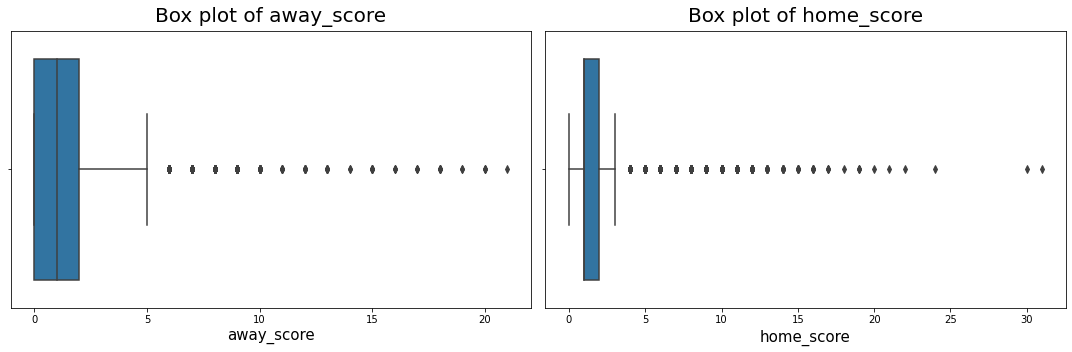

In [ ]:
# Checking for Outliers
#
numeric = results[['away_score', 'home_score']]

columns = None
columns = list(numeric.columns)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))  

i = 0
for column in columns:

  sns.boxplot(x=results[column], ax=ax[i])
  ax[i].set_title(f'Box plot of {column}', fontsize=20, pad=10 )
  ax[i].set_xlabel(column, fontsize=15)
  i+=1

plt.tight_layout()
plt.show()

#### Changing data type 


In [ ]:
results['date'] = pd.to_datetime(results['date'], format="%Y/%m/%d")

#### Adding the column year

In [ ]:
results['year'] = pd.DatetimeIndex(results['date']).year
print(results['year'].unique())

[1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]


#### Adding the column month

In [ ]:
results['month'] = pd.DatetimeIndex(results['date']).month
a = list(results['month'].unique())
b = sorted(a)
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
results['month'].replace({1:'January',
                       2:'February', 
                       3:'March',
                       4:'April', 
                       5:'May',
                       6:'June', 
                       7:'July',
                       8:'August', 
                       9:'September', 
                       10:'October', 
                       11:'November', 
                       12:'December'}, inplace=True)
print(results['month'].unique())

['November' 'March' 'January' 'April' 'February' 'September' 'May' 'July'
 'October' 'June' 'August' 'December']


In [89]:
for i,row in results.iterrows():
  a = results.loc[i, 'tournament']
  b = a.lower()
  if ('world cup' in b)==True:
    results.loc[i, 'tournament'] = 'World cup'
  elif (('friendly' in b)==True):
    pass
  else:
    results.loc[i, 'tournament'] = 'Other'
results['tournament'].unique()

array(['Friendly', 'Other', 'World cup'], dtype=object)

In [93]:
for i,row in results.iterrows():
  home = results.loc[i, 'home_score']
  away = results.loc[i, 'away_score']
  if (home > away):
    results.loc[i, 'status'] = 'Win'
  elif (home < away):
    results.loc[i, 'status'] = 'Lose'
  else:
    results.loc[i, 'status'] = 'Draw'
results['status'].unique()

array(['Draw', 'Win', 'Lose'], dtype=object)

## \ **Exploratory Analysis**\

In [96]:
print(f'{len(list(fifa["country_full"].unique()))} fifa')
print(f'{len(list(results["home_team"].unique()))} results')

216 fifa
309 results


In [ ]:
print(fifa.columns)
print(results.columns)

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date', 'year', 'month'],
      dtype='object')
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')


In [ ]:
df_1_home = fifa[['rank', 'country_full', 'date','year']]
df_1_away = fifa[['rank', 'country_full', 'date','year']]
df_2_home = results[['date', 'home_team', 'home_score', 'tournament', 'year']]
df_2_away = results[['date', 'away_team', 'away_score', 'tournament', 'year']]

In [ ]:
df_1_home = df_1_home.rename(columns={'country_full': 'home_team'})
df_1_away = df_1_away.rename(columns={'country_full': 'away_team'})

In [ ]:
print(df_1.columns)
print(df_2.columns)

Index(['rank', 'country_full', 'date', 'year'], dtype='object')
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'year'],
      dtype='object')


In [ ]:
home = df_2_home.merge(df_1_home, on=['home_team','date'], how='left')
print(home.columns)
print(home.shape)

Index(['date', 'home_team', 'home_score', 'tournament', 'year_x', 'rank',
       'year_y'],
      dtype='object')
(40839, 7)
date              0
home_team         0
home_score        0
tournament        0
year_x            0
rank          39882
year_y        39882
dtype: int64


In [ ]:
away = df_2.merge(df_1, left_on=['away_team','date','year'], right_on=['country_full','date','year'], how='inner')
print(away.columns)
print(away.shape)

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'year', 'rank', 'country_full'],
      dtype='object')
(933, 9)


### Univariate

In [ ]:
home['home_score'].value_counts()

1     287
0     245
2     226
3     105
4      37
5      27
6      10
7       6
9       5
8       4
11      2
31      1
15      1
10      1
Name: home_score, dtype: int64

In [ ]:
home['away_score'].value_counts()

0    387
1    322
2    160
3     55
4     22
5      5
6      3
7      2
9      1
Name: away_score, dtype: int64

In [ ]:
home

(957, 28)

#### Central Tendency

In [ ]:
home.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,year_x,month_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_y,month_y
0,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,August,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,August
1,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,August,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,August
2,50,Zimbabwe,ZIM,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993,August,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False,1993,August
3,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,August,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,August
4,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993,August,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,August


##### mean

In [ ]:
for i in col:
  mean = df_1[i].mean()
  print(f'This is the mean of the {i} column: ')
  print(f'{mean}')
  print('  ')

This is the mean of the price column: 
540088.1417665294
  
This is the mean of the bedrooms column: 
3.37084162309721
  
This is the mean of the bathrooms column: 
1.7497339564151206
  
This is the mean of the sqft_living column: 
2079.8997362698374
  
This is the mean of the sqft_lot column: 
15106.967565816869
  
This is the mean of the floors column: 
1.4462129274048026
  
This is the mean of the waterfront column: 
0.007541757275713691
  
This is the mean of the view column: 
0.23430342849211122
  
This is the mean of the condition column: 
3.4094295100171195
  
This is the mean of the grade column: 
7.656873178179799
  
This is the mean of the sqft_above column: 
1788.3906907879516
  
This is the mean of the sqft_basement column: 
291.5090454818859
  
This is the mean of the yr_built column: 
1971.0051357978994
  
This is the mean of the yr_renovated column: 
84.40225790033776
  
This is the mean of the sqft_living15 column: 
1986.552491556008
  
This is the mean of the sqft_lot1

##### median

In [ ]:
for i in col:
  median = df_1[i].median()
  print(f'This is the median of the {i} column: ')
  print(f'{median}')
  print('  ')

This is the median of the price column: 
450000.0
  
This is the median of the bedrooms column: 
3.0
  
This is the median of the bathrooms column: 
2.0
  
This is the median of the sqft_living column: 
1910.0
  
This is the median of the sqft_lot column: 
7618.0
  
This is the median of the floors column: 
1.0
  
This is the median of the waterfront column: 
0.0
  
This is the median of the view column: 
0.0
  
This is the median of the condition column: 
3.0
  
This is the median of the grade column: 
7.0
  
This is the median of the sqft_above column: 
1560.0
  
This is the median of the sqft_basement column: 
0.0
  
This is the median of the yr_built column: 
1975.0
  
This is the median of the yr_renovated column: 
0.0
  
This is the median of the sqft_living15 column: 
1840.0
  
This is the median of the sqft_lot15 column: 
7620.0
  


##### mode

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long'], axis=1)

col = list(df_1.columns)
for i in col:
  mode = df_1[i].mode()[0]
  print(f'This is the mode of the {i} column: ')
  print(f'{mode}')
  print('  ')

This is the mode of the price column: 
350000.0
  
This is the mode of the bedrooms column: 
3
  
This is the mode of the bathrooms column: 
2
  
This is the mode of the sqft_living column: 
1300
  
This is the mode of the sqft_lot column: 
5000
  
This is the mode of the floors column: 
1
  
This is the mode of the waterfront column: 
0
  
This is the mode of the view column: 
0
  
This is the mode of the condition column: 
3
  
This is the mode of the grade column: 
7
  
This is the mode of the sqft_above column: 
1300
  
This is the mode of the sqft_basement column: 
0
  
This is the mode of the yr_built column: 
2014
  
This is the mode of the yr_renovated column: 
0
  
This is the mode of the zipcode column: 
98103
  
This is the mode of the sqft_living15 column: 
1540
  
This is the mode of the sqft_lot15 column: 
5000
  
This is the mode of the city column: 
Seattle
  
This is the mode of the county column: 
King County
  


#### Dispersion

##### Standard Deviation

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)

col = list(df_1.columns)

for i in col:
  mode = df_1[i].std()
  print(f'This is the Standard Deviation of the {i} column: ')
  print(f'{mode}')
  print('  ')

This is the Standard Deviation of the price column: 
367127.1964826997
  
This is the Standard Deviation of the bedrooms column: 
0.9300618311474632
  
This is the Standard Deviation of the bathrooms column: 
0.7348730839294794
  
This is the Standard Deviation of the sqft_living column: 
918.4408970468115
  
This is the Standard Deviation of the sqft_lot column: 
41420.51151513528
  
This is the Standard Deviation of the floors column: 
0.5518935204356594
  
This is the Standard Deviation of the waterfront column: 
0.0865171977279032
  
This is the Standard Deviation of the view column: 
0.7663175692736397
  
This is the Standard Deviation of the condition column: 
0.6507430463662665
  
This is the Standard Deviation of the grade column: 
1.1754587569743042
  
This is the Standard Deviation of the sqft_above column: 
828.0909776519151
  
This is the Standard Deviation of the sqft_basement column: 
442.57504267744406
  
This is the Standard Deviation of the yr_built column: 
29.3734108

##### Variance

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)
col = list(df_1.columns)

for i in col:
  variance = df_1[i].var()
  print(f'This is the variance of the {i} column: ')
  print(f'{variance}')
  print('  ')

This is the variance of the price column: 
134782378397.24681
  
This is the variance of the bedrooms column: 
0.8650150097573724
  
This is the variance of the bathrooms column: 
0.5400384494840236
  
This is the variance of the sqft_living column: 
843533.6813681519
  
This is the variance of the sqft_lot column: 
1715658774.1754541
  
This is the variance of the floors column: 
0.3045864578988656
  
This is the variance of the waterfront column: 
0.007485225502689098
  
This is the variance of the view column: 
0.5872426169774596
  
This is the variance of the condition column: 
0.42346651239404876
  
This is the variance of the grade column: 
1.3817032893475767
  
This is the variance of the sqft_above column: 
685734.6672685045
  
This is the variance of the sqft_basement column: 
195872.66840094145
  
This is the variance of the yr_built column: 
862.7972621659717
  
This is the variance of the yr_renovated column: 
161346.2118623043
  
This is the variance of the sqft_living15 c

##### Maximum

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)

col = list(df_1.columns)

for i in col:
  max = df_1[i].max()
  print(f'This is the largest value in the {i} column: ')
  print(f'{max}')
  print('  ')

This is the largest value in the price column: 
7700000.0
  
This is the largest value in the bedrooms column: 
33
  
This is the largest value in the bathrooms column: 
8
  
This is the largest value in the sqft_living column: 
13540
  
This is the largest value in the sqft_lot column: 
1651359
  
This is the largest value in the floors column: 
3
  
This is the largest value in the waterfront column: 
1
  
This is the largest value in the view column: 
4
  
This is the largest value in the condition column: 
5
  
This is the largest value in the grade column: 
13
  
This is the largest value in the sqft_above column: 
9410
  
This is the largest value in the sqft_basement column: 
4820
  
This is the largest value in the yr_built column: 
2015
  
This is the largest value in the yr_renovated column: 
2015
  
This is the largest value in the sqft_living15 column: 
6210
  
This is the largest value in the sqft_lot15 column: 
871200
  


##### Minimum

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)

col = list(df_1.columns)

for i in col:
  min = df_1[i].min()
  print(f'This is the small value in the {i} column: ')
  print(f'{min}')
  print('  ')

This is the small value in the price column: 
75000.0
  
This is the small value in the bedrooms column: 
0
  
This is the small value in the bathrooms column: 
0
  
This is the small value in the sqft_living column: 
290
  
This is the small value in the sqft_lot column: 
520
  
This is the small value in the floors column: 
1
  
This is the small value in the waterfront column: 
0
  
This is the small value in the view column: 
0
  
This is the small value in the condition column: 
1
  
This is the small value in the grade column: 
1
  
This is the small value in the sqft_above column: 
290
  
This is the small value in the sqft_basement column: 
0
  
This is the small value in the yr_built column: 
1900
  
This is the small value in the yr_renovated column: 
0
  
This is the small value in the sqft_living15 column: 
399
  
This is the small value in the sqft_lot15 column: 
651
  


##### Range

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)

col = list(df_1.columns)

for i in col:
  max = df_1[i].max()
  min = df_1[i].min()
  range = max - min
  print(f'This is the range of the {i} column: ')
  print(f'{range}')
  print('  ')

This is the range of the price column: 
7625000.0
  
This is the range of the bedrooms column: 
33
  
This is the range of the bathrooms column: 
8
  
This is the range of the sqft_living column: 
13250
  
This is the range of the sqft_lot column: 
1650839
  
This is the range of the floors column: 
2
  
This is the range of the waterfront column: 
1
  
This is the range of the view column: 
4
  
This is the range of the condition column: 
4
  
This is the range of the grade column: 
12
  
This is the range of the sqft_above column: 
9120
  
This is the range of the sqft_basement column: 
4820
  
This is the range of the yr_built column: 
115
  
This is the range of the yr_renovated column: 
2015
  
This is the range of the sqft_living15 column: 
5811
  
This is the range of the sqft_lot15 column: 
870549
  


##### Quantiles

###### First Quantile

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)

col = list(df_1.columns)

for i in col:
  first_quantile = df_1[i].quantile(0.25)
  print(f'This is the first quantile of the {i} column: ')
  print(f'{first_quantile}')
  print('  ')

This is the first quantile of the price column: 
321950.0
  
This is the first quantile of the bedrooms column: 
3.0
  
This is the first quantile of the bathrooms column: 
1.0
  
This is the first quantile of the sqft_living column: 
1427.0
  
This is the first quantile of the sqft_lot column: 
5040.0
  
This is the first quantile of the floors column: 
1.0
  
This is the first quantile of the waterfront column: 
0.0
  
This is the first quantile of the view column: 
0.0
  
This is the first quantile of the condition column: 
3.0
  
This is the first quantile of the grade column: 
7.0
  
This is the first quantile of the sqft_above column: 
1190.0
  
This is the first quantile of the sqft_basement column: 
0.0
  
This is the first quantile of the yr_built column: 
1951.0
  
This is the first quantile of the yr_renovated column: 
0.0
  
This is the first quantile of the sqft_living15 column: 
1490.0
  
This is the first quantile of the sqft_lot15 column: 
5100.0
  


###### Second Quantile

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)

col = list(df_1.columns)

for i in col:
  second_quantile = df_1[i].quantile(0.5)
  print(f'This is the second quantile of the {i} column: ')
  print(f'{second_quantile}')
  print('  ')

This is the second quantile of the price column: 
450000.0
  
This is the second quantile of the bedrooms column: 
3.0
  
This is the second quantile of the bathrooms column: 
2.0
  
This is the second quantile of the sqft_living column: 
1910.0
  
This is the second quantile of the sqft_lot column: 
7618.0
  
This is the second quantile of the floors column: 
1.0
  
This is the second quantile of the waterfront column: 
0.0
  
This is the second quantile of the view column: 
0.0
  
This is the second quantile of the condition column: 
3.0
  
This is the second quantile of the grade column: 
7.0
  
This is the second quantile of the sqft_above column: 
1560.0
  
This is the second quantile of the sqft_basement column: 
0.0
  
This is the second quantile of the yr_built column: 
1975.0
  
This is the second quantile of the yr_renovated column: 
0.0
  
This is the second quantile of the sqft_living15 column: 
1840.0
  
This is the second quantile of the sqft_lot15 column: 
7620.0
  


###### Third Quantile

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)

col = list(df_1.columns)

for i in col:
  third_quantile = df_1[i].quantile(0.75)
  print(f'This is the third quantile of the {i} column: ')
  print(f'{third_quantile}')
  print('  ')

This is the third quantile of the price column: 
645000.0
  
This is the third quantile of the bedrooms column: 
4.0
  
This is the third quantile of the bathrooms column: 
2.0
  
This is the third quantile of the sqft_living column: 
2550.0
  
This is the third quantile of the sqft_lot column: 
10688.0
  
This is the third quantile of the floors column: 
2.0
  
This is the third quantile of the waterfront column: 
0.0
  
This is the third quantile of the view column: 
0.0
  
This is the third quantile of the condition column: 
4.0
  
This is the third quantile of the grade column: 
8.0
  
This is the third quantile of the sqft_above column: 
2210.0
  
This is the third quantile of the sqft_basement column: 
560.0
  
This is the third quantile of the yr_built column: 
1997.0
  
This is the third quantile of the yr_renovated column: 
0.0
  
This is the third quantile of the sqft_living15 column: 
2360.0
  
This is the third quantile of the sqft_lot15 column: 
10083.0
  


#### Descriptions of the distribution curve

##### Skewness

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)
col = list(df_1.columns)

for i in col:
  skewness = df_1[i].skew()
  print(f'This is the skewness of the {i} column: ')
  print(f'{skewness}')
  print('  ')

This is the skewness of the price column: 
4.024069144684712
  
This is the skewness of the bedrooms column: 
1.97429953543601
  
This is the skewness of the bathrooms column: 
0.90210538977192
  
This is the skewness of the sqft_living column: 
1.471555426802092
  
This is the skewness of the sqft_lot column: 
13.060018959031755
  
This is the skewness of the floors column: 
0.7261783875781029
  
This is the skewness of the waterfront column: 
11.385107942339081
  
This is the skewness of the view column: 
3.395749593248714
  
This is the skewness of the condition column: 
1.0328046374434587
  
This is the skewness of the grade column: 
0.7711032007576067
  
This is the skewness of the sqft_above column: 
1.4466644733818372
  
This is the skewness of the sqft_basement column: 
1.5779650555996247
  
This is the skewness of the yr_built column: 
-0.46980539881436767
  
This is the skewness of the yr_renovated column: 
4.549493366993928
  
This is the skewness of the sqft_living15 column

##### Kurtosis

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'city', 'county'], axis=1)
col = list(df_1.columns)

for i in col:
  kurtosis = df_1[i].kurt()
  print(f'This is the kurtosis of the {i} column: ')
  print(f'{kurtosis}')
  print('  ')

This is the kurtosis of the price column: 
34.58554043194243
  
This is the kurtosis of the bedrooms column: 
49.06365318170099
  
This is the kurtosis of the bathrooms column: 
1.9895744894891259
  
This is the kurtosis of the sqft_living column: 
5.24309298981711
  
This is the kurtosis of the sqft_lot column: 
285.0778196973658
  
This is the kurtosis of the floors column: 
-0.5514105415895778
  
This is the kurtosis of the waterfront column: 
127.63249356537696
  
This is the kurtosis of the view column: 
10.893021684601504
  
This is the kurtosis of the condition column: 
0.5257635652845423
  
This is the kurtosis of the grade column: 
1.1909320773987657
  
This is the kurtosis of the sqft_above column: 
3.40230362139787
  
This is the kurtosis of the sqft_basement column: 
2.7155742114129353
  
This is the kurtosis of the yr_built column: 
-0.657407504733527
  
This is the kurtosis of the yr_renovated column: 
18.701152117599058
  
This is the kurtosis of the sqft_living15 column

Observations

> Majority of houses sold were 3 bedroom houses.
> 
> Majority of houses sold have 2 bathrooms.
> 
>Majority of houses sold have 1 floor.

### Bivariate

## \ **Implementing the Solution**\

### Approach 1: Polynomial approach

#### Model 1: Predict how many goals the home team scores.

#### Model 2: Predict how many goals the away team scores.

### Approach 2: Logistic approach

## Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?